<a href="https://colab.research.google.com/github/JoelVillagomez1220/Simulaci-n-2-/blob/main/BlackandScholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos de Apple
aapl = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Mostrar las primeras filas del DataFrame
aapl.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650360,132079200


In [2]:
# Calcular los rendimientos logarítmicos
aapl['Log Returns'] = np.log(aapl['Adj Close'] / aapl['Adj Close'].shift(1))

# Mostrar las primeras filas con los rendimientos logarítmicos
aapl.head()


,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800,-0.009770
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200,0.007937
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000,-0.004714
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650360,132079200,0.015958


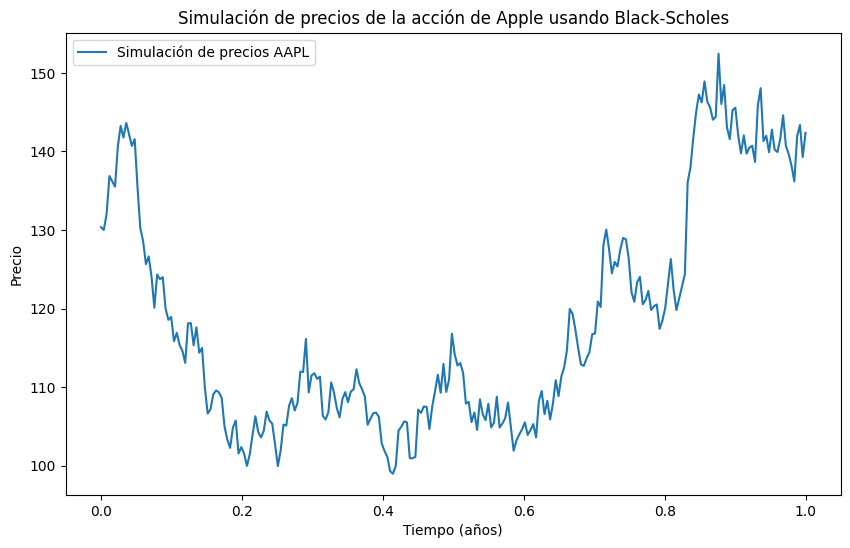

In [3]:
# Parámetros
mu = aapl['Log Returns'].mean() * 252  # Deriva anualizada
sigma = aapl['Log Returns'].std() * np.sqrt(252)  # Volatilidad anualizada
T = 1  # Tiempo en años
P0 = aapl['Adj Close'][-1]  # Precio inicial (último precio de cierre ajustado)

# Generar movimiento browniano
np.random.seed(42)  # Fijar semilla para reproducibilidad
n = 252  # Número de días de negociación en un año
dt = T / n
Wt = np.random.normal(0, np.sqrt(dt), n).cumsum()

# Calcular precios simulados
time = np.linspace(0, T, n)
Pt = P0 * np.exp((mu - 0.5 * sigma**2) * time + sigma * Wt)

# Plot de los precios simulados
plt.figure(figsize=(10, 6))
plt.plot(time, Pt, label='Simulación de precios AAPL')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio')
plt.title('Simulación de precios de la acción de Apple usando Black-Scholes')
plt.legend()
plt.show()
